In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date


In [2]:
data = pd.read_csv('../Data/data_toulouse/merged_toulouse_11.csv')      #fichier contenant 8 jours du mois Novembre des vols Toulouse

In [3]:
def show_age_distribution(data):

    data['age_avion'] = data['age_avion'].fillna(-1)
    
    # Create a new column that maps the age of each aircraft to a decade
    def map_to_decade(x):
        if x < 10:
            return 0
        else:
            return (( -1 if np.isnan(x) else date.today().year - x) // 10) * 10

    data['decade'] = data['age_avion'].apply(map_to_decade)

    # Calculate the count of aircraft by decade
    count_by_decade = data['decade'].value_counts(dropna=False)


    def label_age_avion(decade):
        if decade == 0:
            return "0-10 ans"
        if decade == 10:
            return "10-20 ans"
        if decade == 20:
            return "20-30 ans"
        else:
            return "Plus de 30 ans"

    fig, ax = plt.subplots(figsize=(10, 7))
    labels = count_by_decade.index.map(label_age_avion)
    ax.pie(count_by_decade, labels=labels, autopct='%1.1f%%')



In [4]:
def show_type_repartition(data):

    #from PIL import Image            
    #image2 = Image.open('repartition_type.png')
    #st.image(image2)
    # Compute the count of aircraft by type
    count_by_type = data.groupby('type_avion')['type_avion'].count()

    # Get the list of types with count greater than 2% of total count
    types = count_by_type[count_by_type / count_by_type.sum() > 0.02].index.tolist()

    # Compute the count of aircraft for the "other" category
    other_count = count_by_type[count_by_type / count_by_type.sum() <= 0.02].sum()

    # Add the "other" category to the types list
    types.append('Autres')

    # Create a new Series with the count of aircraft by type, grouped by the types list
    count_by_type_grouped = data['type_avion'].apply(lambda x: x if x in types else 'Autres').value_counts()

    # Create the pie chart
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.pie(count_by_type_grouped, labels=count_by_type_grouped.index.tolist(), autopct='%1.1f%%')
    

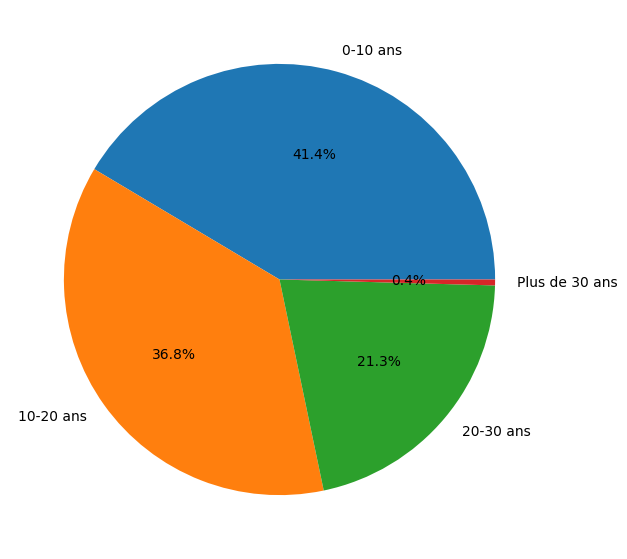

In [5]:
show_age_distribution(data)

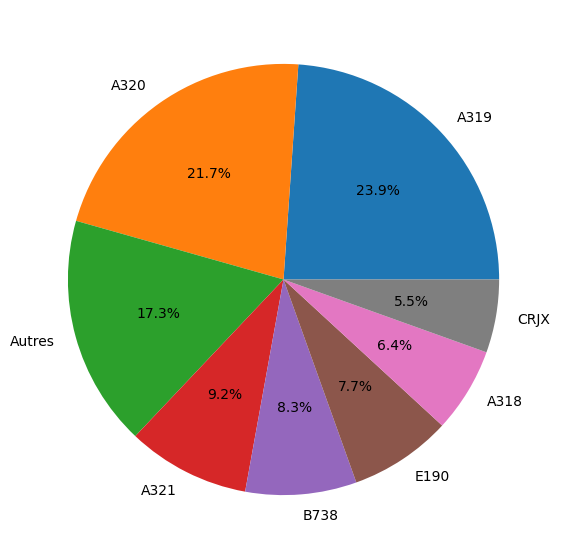

In [6]:
show_type_repartition(data)